In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [2]:


# Step 1: Read the CSV file
df = pd.read_csv('/kaggle/input/anaemia-prediction/output.csv')



In [4]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,1,49.9999,29.2860,20.7141,14.5,1
100,101,3,42.2324,30.6757,27.0919,6.3,1
101,102,0,45.6064,31.9084,22.4852,12.7,0
102,103,3,45.2095,29.2769,25.5136,13.4,0


In [3]:
# Step 2: Preprocess the data
# Encode categorical variables (Sex, Anaemia)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])



In [7]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Anaemic'])
y = df['Anaemic']




In [8]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print number of files in training and testing sets
print(f"Number of files in training set: {len(X_train)}")
print(f"Number of files in testing set: {len(X_test)}")

Number of files in training set: 83
Number of files in testing set: 21


In [9]:
# Step 4: Train a machine learning classifier (Random Forest in this case)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:

# Step 5: Evaluate the classifier
y_pred = classifier.predict(X_test)

# Print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



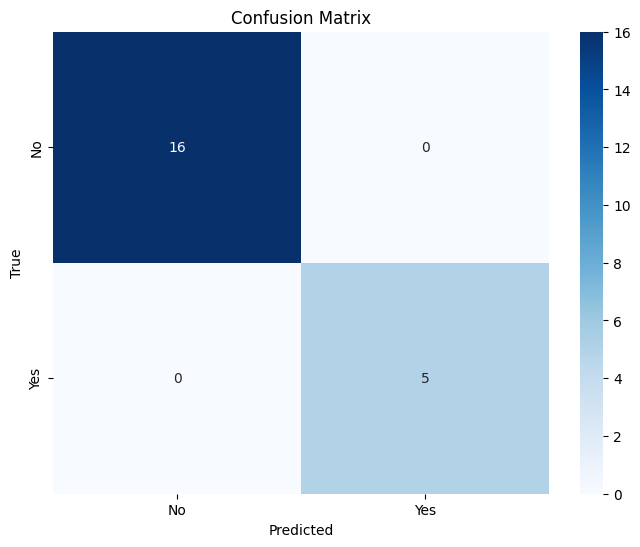

In [13]:
import matplotlib.pyplot as plt
# Step 6: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##Code by Kuldeep Raghuwanshi